In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
columns = [i for i in df.columns]

# **Data Preprocessing**

## Checking presence of null values



In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

As we can see there is not null value present

## Plotting the distribution to check the skewness and dealing with skewed data

In [ ]:
def plot_skewness(data):
    fig, ax =plt.subplots(5,3, figsize=(15, 15))
    for ind,elem in enumerate(data):
        sns.distplot(data[elem],ax = ax[ind//3,ind%3])  
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

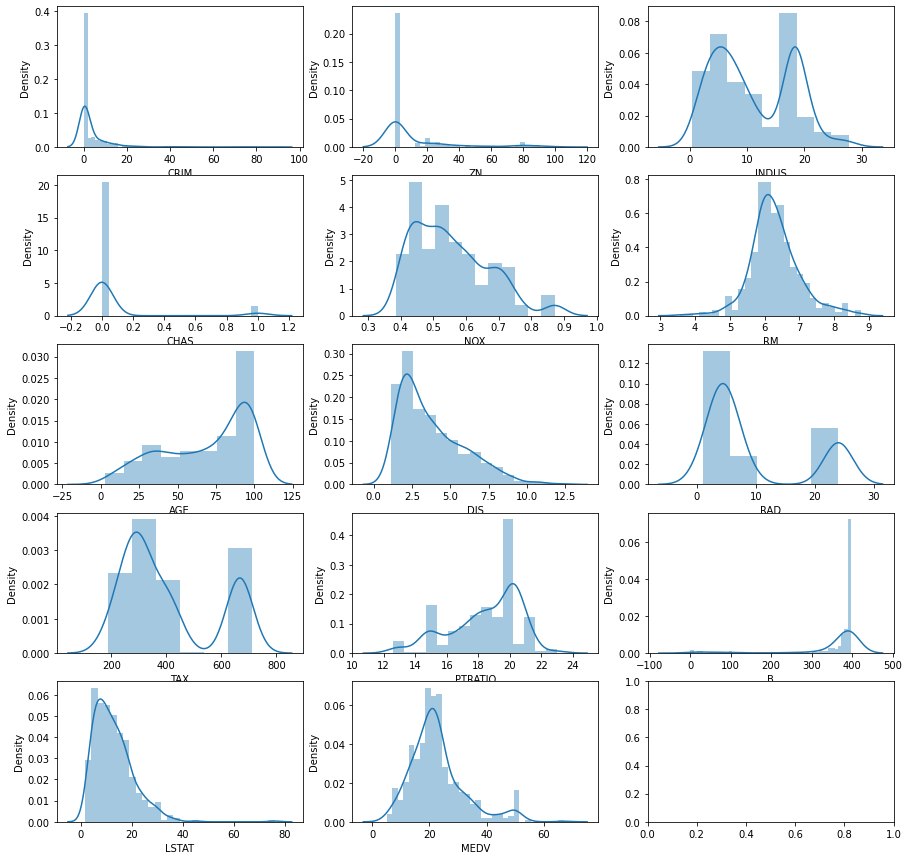

In [ ]:
plot_skewness(df)

As we can see in the distribution plot, some of them are skewed distribution.
Now to remove that skewness we can perform log() transformation on the required columns.

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

We are going to perform log() transform on highly skewed data only.

In [ ]:
df.skew()

CRIM       5.249162
ZN         2.242046
INDUS      0.290051
CHAS       3.426722
NOX        0.731239
RM         0.392988
AGE       -0.601268
DIS        1.026020
RAD        1.019393
TAX        0.684024
PTRATIO   -0.730858
B         -2.898598
LSTAT      1.808184
MEDV       1.227121
dtype: float64

In [ ]:
# performing log transformation on highly skewed data

df['CRIM'] = np.log(df['CRIM'])
df['ZN'] = np.log(1+df['ZN'])
df['CHAS'] = np.log1p(df['CHAS'])
df['DIS'] = np.log(df['DIS'])
df['RAD'] = np.log(df['RAD'])
df['B'] = np.log(0.01+df['B'])
df['LSTAT'] = np.log(df['LSTAT'])

In [ ]:
# value of skewness after log transformation
df.skew()

CRIM       0.405450
ZN         1.208590
INDUS      0.290051
CHAS       3.426722
NOX        0.731239
RM         0.392988
AGE       -0.601268
DIS        0.163563
RAD        0.304006
TAX        0.684024
PTRATIO   -0.730858
B         -4.843906
LSTAT     -0.253495
MEDV       1.227121
dtype: float64

Again, plotting the distribution to check the changes made on the dataset after performing log() transformation.
As we can see, most of the data are now in normal distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

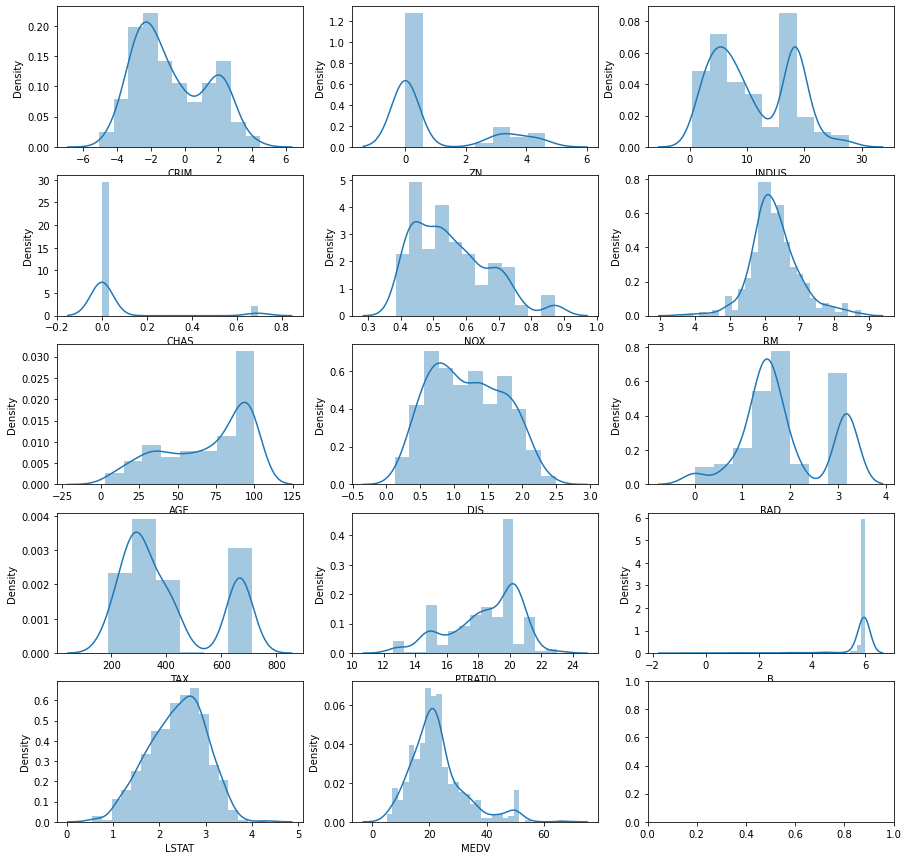

In [ ]:
plot_skewness(df)

## **Checking the correlation between the features**

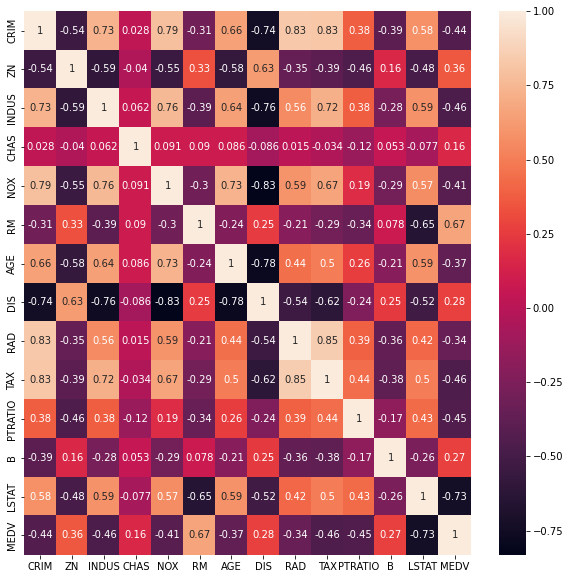

In [ ]:
corr = df.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

There is no major correlation present between the features, so we need to use all the features. 

## Scaling the data and preparing training and testing dataset

In [ ]:
std_scaler = StandardScaler()

In [ ]:
new_df = pd.DataFrame(std_scaler.fit_transform(df),columns=columns)
new_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-1.992885,1.239079,-1.296065,-0.271163,-0.145462,0.408774,-0.121697,0.414680,-2.130812,-0.664367,-1.455741,0.302894,-1.273679,0.139083
1,-1.312220,-0.585209,-0.598270,-0.271163,-0.744435,0.189745,0.366340,0.776515,-1.336802,-0.986295,-0.318443,0.302894,-0.276211,-0.114216
2,-1.312561,-0.585209,-0.598270,-0.271163,-0.744435,1.276353,-0.267752,0.776515,-1.336802,-0.986295,-0.318443,0.289478,-1.621368,1.268373
3,-1.233166,-0.585209,-1.315123,-0.271163,-0.839924,1.010390,-0.812787,1.147559,-0.872336,-1.105528,0.090984,0.295428,-2.139389,1.131170
4,-0.880820,-0.585209,-1.315123,-0.271163,-0.839924,1.222307,-0.513552,1.147559,-0.872336,-1.105528,0.090984,0.302894,-1.162108,1.426685


In [ ]:
data,label = new_df.loc[:,:'LSTAT'],new_df.loc[:,'MEDV']

In [ ]:
train_data,test_data,train_label,test_label = train_test_split(data,label,test_size=0.33,shuffle=True)

## Model selection and training

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()

In [ ]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
train_data = train_data.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
test_data = test_data.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [ ]:
rfg.fit(train_data,train_label)
rfg.score(test_data,test_label)

0.8137962851242952

In [ ]:
lg.fit(train_data,train_label)
lg.score(test_data,test_label)

0.6348064767749462

As we can see score is better with random forest, so we can use random forest in this dataset